### Preprocessing

In [11]:
# import relevant statistical packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [12]:
# import data visualisation packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [13]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/OJ.csv"
df = pd.read_csv(url, index_col='SlNo')
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
SlNo,,,,,,,,,,,,,,,,,,
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [14]:
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
SlNo,,,,,,,,,,,,,,,,,,
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [15]:
df.Purchase = df.Purchase.map(lambda x: 1 if x=='CH' else 0)
df.Store7 = df.Store7.map({'No': 0, 'Yes': 1})

In [16]:
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
SlNo,,,,,,,,,,,,,,,,,,
1,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
2,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
3,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
4,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
5,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
Purchase          1070 non-null int64
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null int64
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(7)
memory usage: 158.8 KB


### 9.a. Splitting data set into training data set and test data set

In [27]:
X = df.drop(columns='Purchase') # For this, I checked question 9.b. to find out the response variable
y = df.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.747663551402, test_size=0.25233644859, random_state=42)

In [29]:
len(X_train)

800

### 9.b., 9.c., 9.d. & 9.e. Fitting a tree, plotting it and interpreting the results

In [55]:
tree = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
tree_score = tree.score(X_train, y_train)
print("Training error rate: ", round(1-tree_score, 2))

Training error rate:  0.11


In [58]:
tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [51]:
tree_pred = tree.predict(X_test)
class_mat = pd.DataFrame(confusion_matrix(y_test, tree_pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(class_mat)

     No  Yes
No   72   23
Yes  39  136


In [52]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       111
           1       0.78      0.86      0.81       159

   micro avg       0.77      0.77      0.77       270
   macro avg       0.77      0.75      0.76       270
weighted avg       0.77      0.77      0.77       270



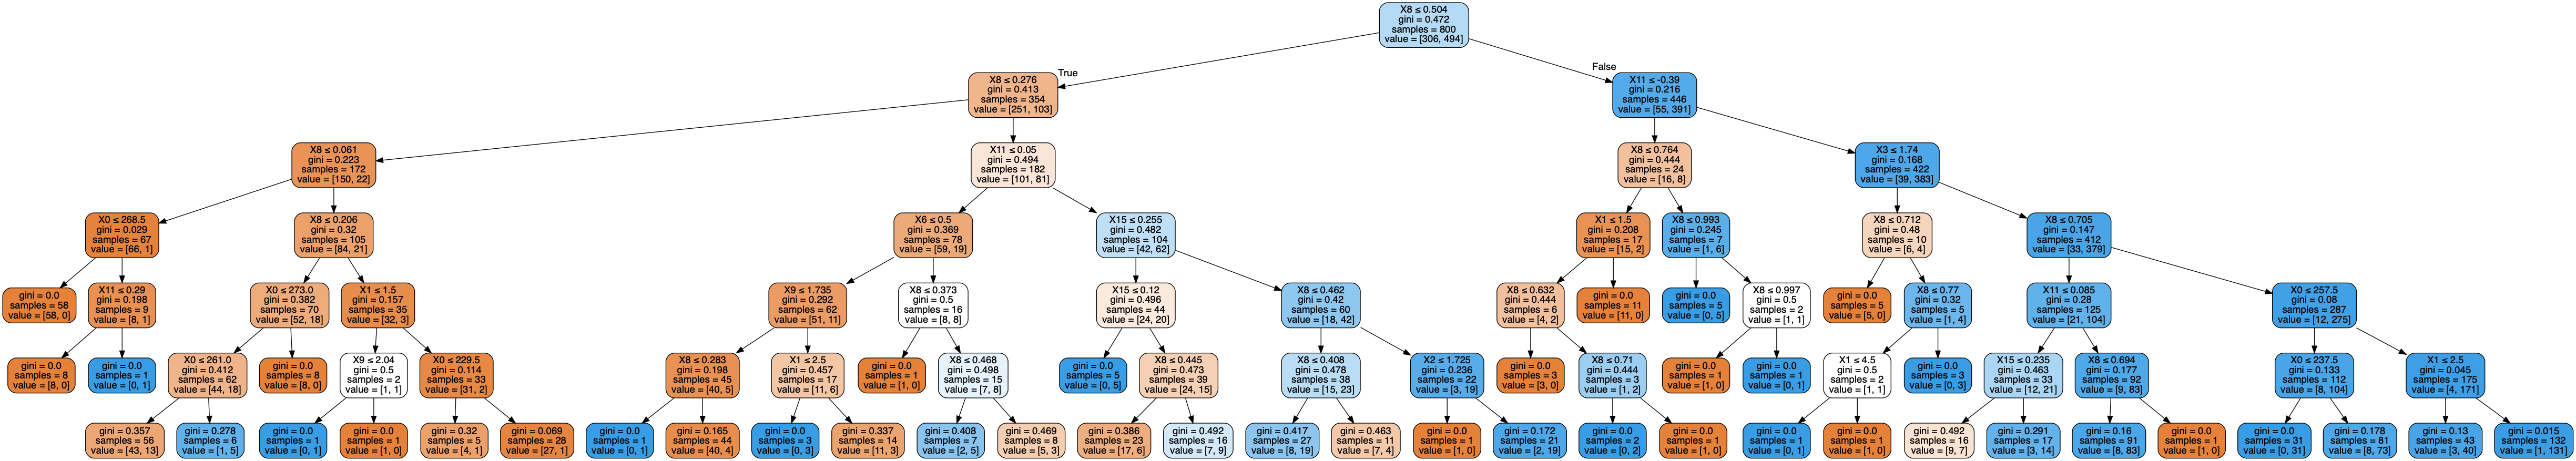

In [53]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**So, a classification tree produces the best result at a depth of 6 nodes, which yields 42 leaves. The training error rate is $\approx$0.11**

### 9.f., 9.g. & 9.h. Pruning and plotting the pruned tree

In [68]:
SCORES = []
max_leafs_arr = range(2, 50)
for max_leafs in max_leafs_arr:
    regressionTree = DecisionTreeClassifier(max_leaf_nodes=max_leafs)
    sc = cross_val_score(regressionTree, X, y, cv=10, scoring="neg_mean_squared_error")
    SCORES.append((-sc.mean(), sc.std()))
SCORES = np.array(SCORES)

The best tree has 10 leafs.


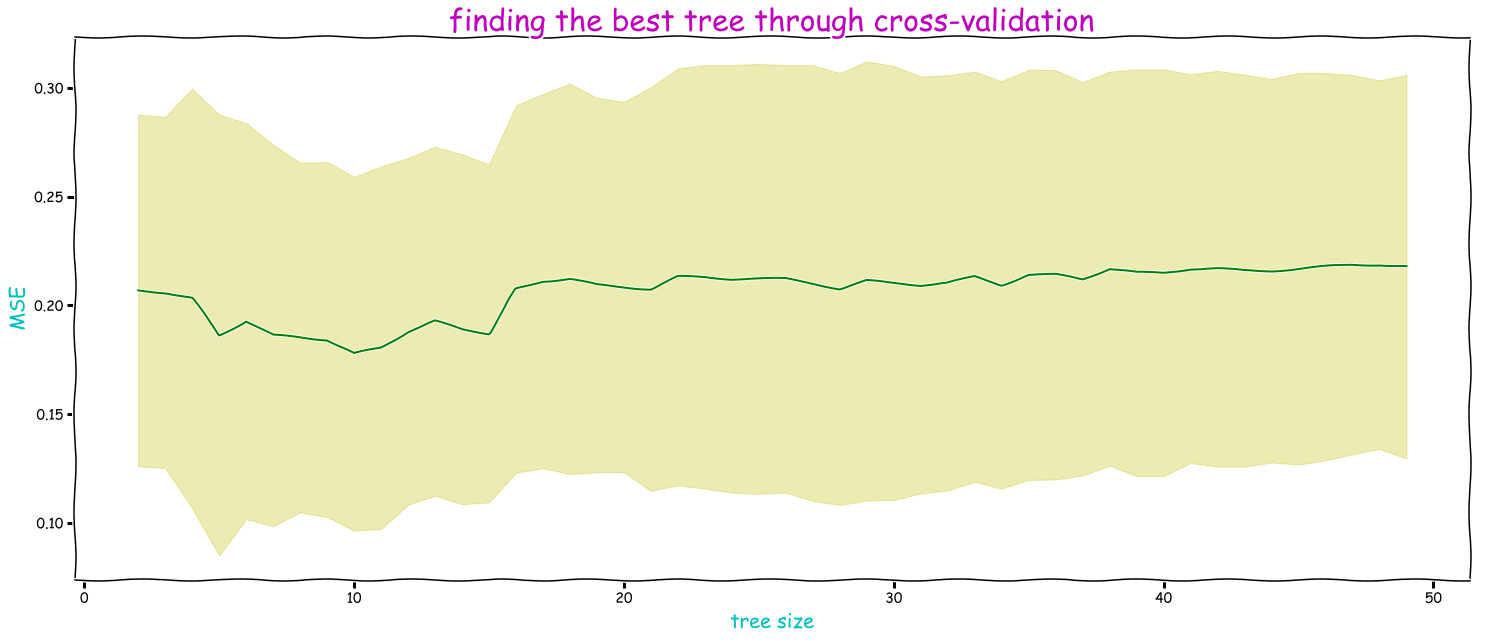

In [69]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(max_leafs_arr, SCORES[:,0], 'g')
plt.fill_between(max_leafs_arr, SCORES[:,0]+SCORES[:,1], SCORES[:,0]-SCORES[:,1], alpha=0.3, color='y')
plt.xlabel('tree size', fontsize=20, color='c')
plt.ylabel('MSE', fontsize=20, color='c')
plt.title('finding the best tree through cross-validation', fontsize=30, color='m')
best_min_leafs = max_leafs_arr[np.argmin(SCORES[:,0])]
print(f"The best tree has {best_min_leafs} leafs.")

**Therefore, a tree at $m$=10 leaves has the lowest cross-validated classification error rate.**

### 9.i. Producing a tree using pruned data

In [71]:
pruned_tree = DecisionTreeClassifier(max_depth = 10)
pruned_tree.fit(X_train, y_train)
pruned_tree_score = pruned_tree.score(X_train, y_train)
print("Training error rate: ", round(1-pruned_tree_score, 2))

Training error rate:  0.03


**Therefore, non-pruned tree results in higher training error rate.**

In [73]:
pruned_tree_pred = pruned_tree.predict(X_test)
pruned_class_mat = pd.DataFrame(confusion_matrix(y_test, pruned_tree_pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(pruned_class_mat)

     No  Yes
No   74   37
Yes  37  122


In [77]:
print(classification_report(y_test, pruned_tree_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       111
           1       0.77      0.77      0.77       159

   micro avg       0.73      0.73      0.73       270
   macro avg       0.72      0.72      0.72       270
weighted avg       0.73      0.73      0.73       270



**Therefore, pruned tree results in higher test error rate.**